# Linear Regression and Random Forest Model Practice
- Trying to understand the sklearn library as I am only used to regclass in r for statistic models. 
- For this I followed along to NueralNine's video (https://www.youtube.com/watch?v=Wqmtf9SA_kk)

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
data = pd.read_csv('housing.csv')

In [106]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [108]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [109]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [110]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3)

In [112]:
train_data = x_train.join(y_train)

In [113]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4628,-118.31,34.06,30.0,3110.0,1269.0,2535.0,1218.0,1.6987,<1H OCEAN,412500.0
7941,-118.12,33.87,43.0,1633.0,355.0,837.0,350.0,3.0405,<1H OCEAN,188000.0
13606,-117.27,34.17,16.0,30.0,3.0,49.0,8.0,4.6250,INLAND,250000.0
1049,-120.62,38.39,15.0,3750.0,691.0,1444.0,603.0,2.7399,INLAND,134800.0
17461,-119.88,34.43,14.0,2472.0,685.0,1292.0,621.0,3.3026,NEAR OCEAN,229500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

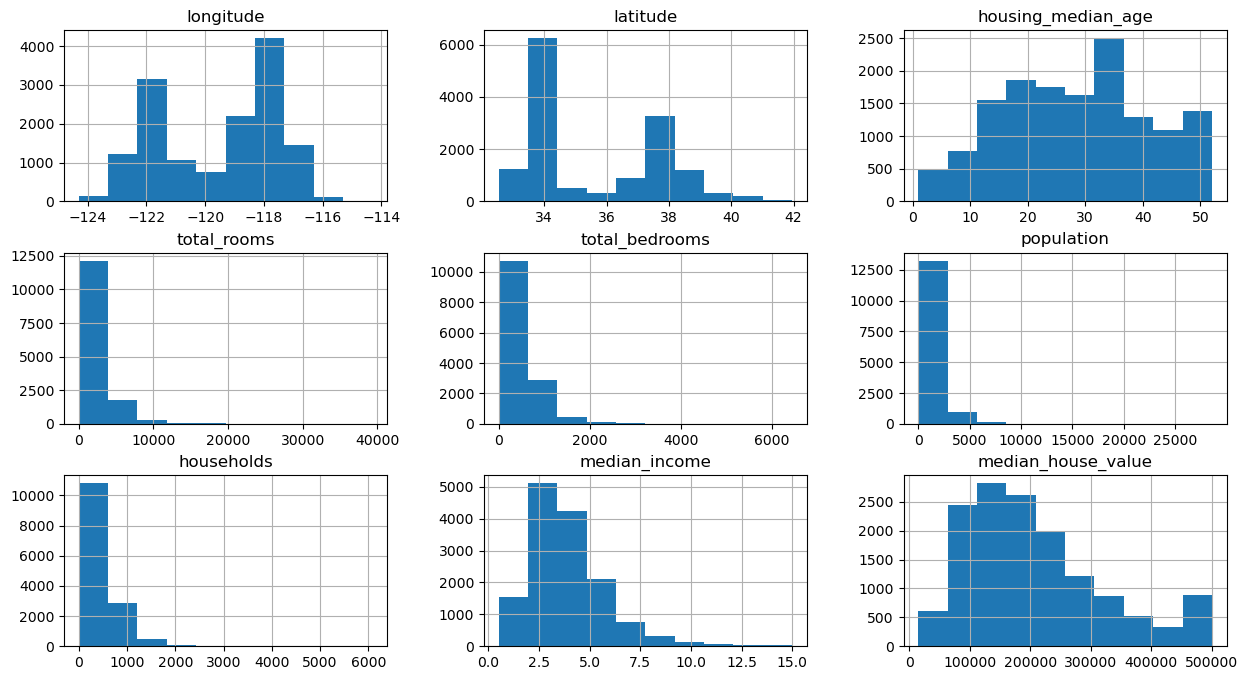

In [114]:
train_data.hist(figsize=(15,8))

In [116]:
#creating logarithmic transormations to some of the predictor variables such as 

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

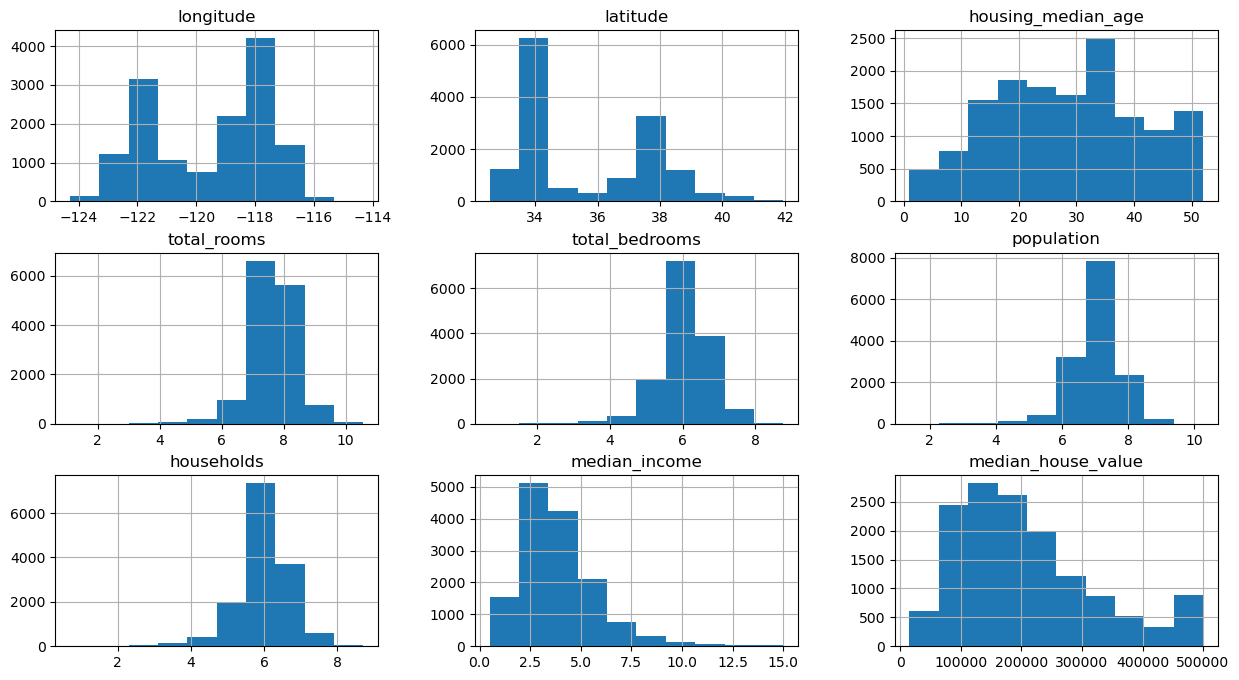

In [117]:
train_data.hist(figsize=(15,8))

In [118]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [119]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4628,-118.31,34.06,30.0,8.042699,7.146772,7.838343,7.105786,1.6987,412500.0,True,False,False,False,False
7941,-118.12,33.87,43.0,7.398786,5.874931,6.731018,5.860786,3.0405,188000.0,True,False,False,False,False
13606,-117.27,34.17,16.0,3.433987,1.386294,3.912023,2.197225,4.6250,250000.0,False,True,False,False,False
1049,-120.62,38.39,15.0,8.229778,6.539586,7.275865,6.403574,2.7399,134800.0,False,True,False,False,False
17461,-119.88,34.43,14.0,7.813187,6.530878,7.164720,6.432940,3.3026,229500.0,False,False,False,False,True


<Axes: >

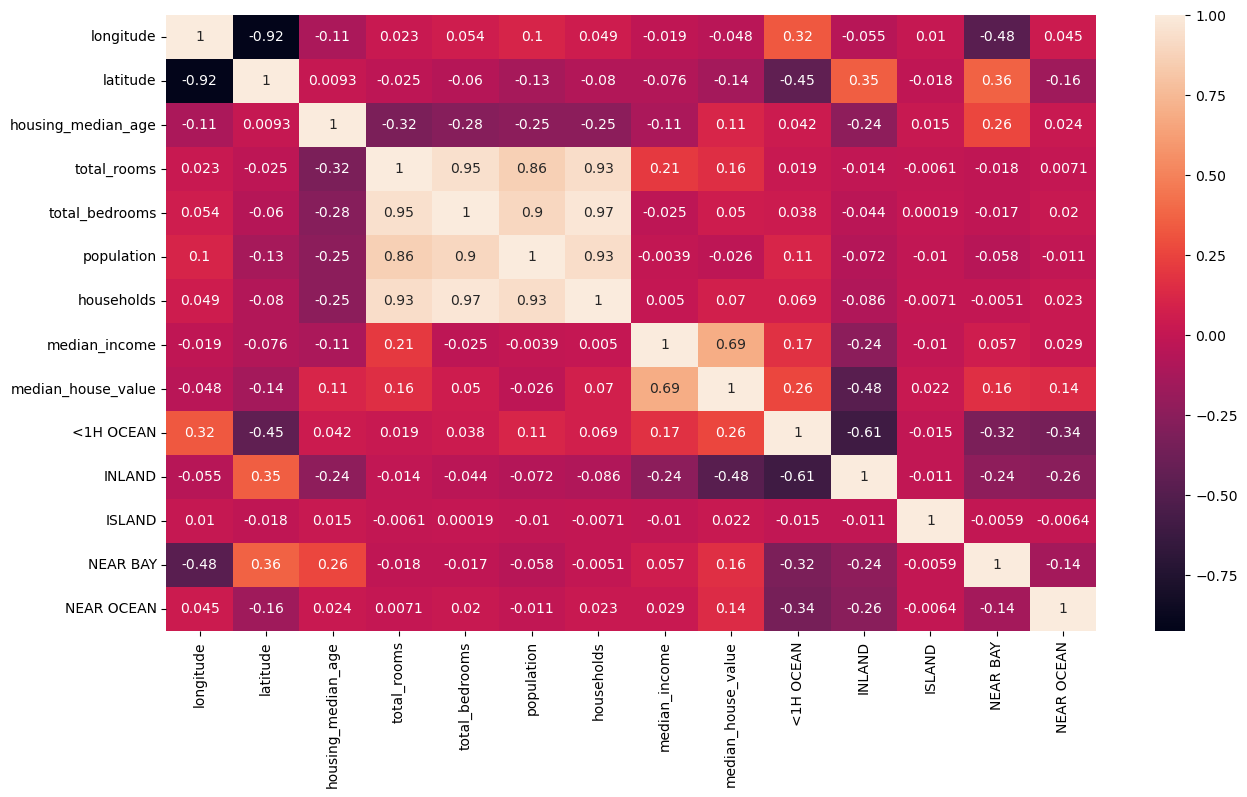

In [120]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

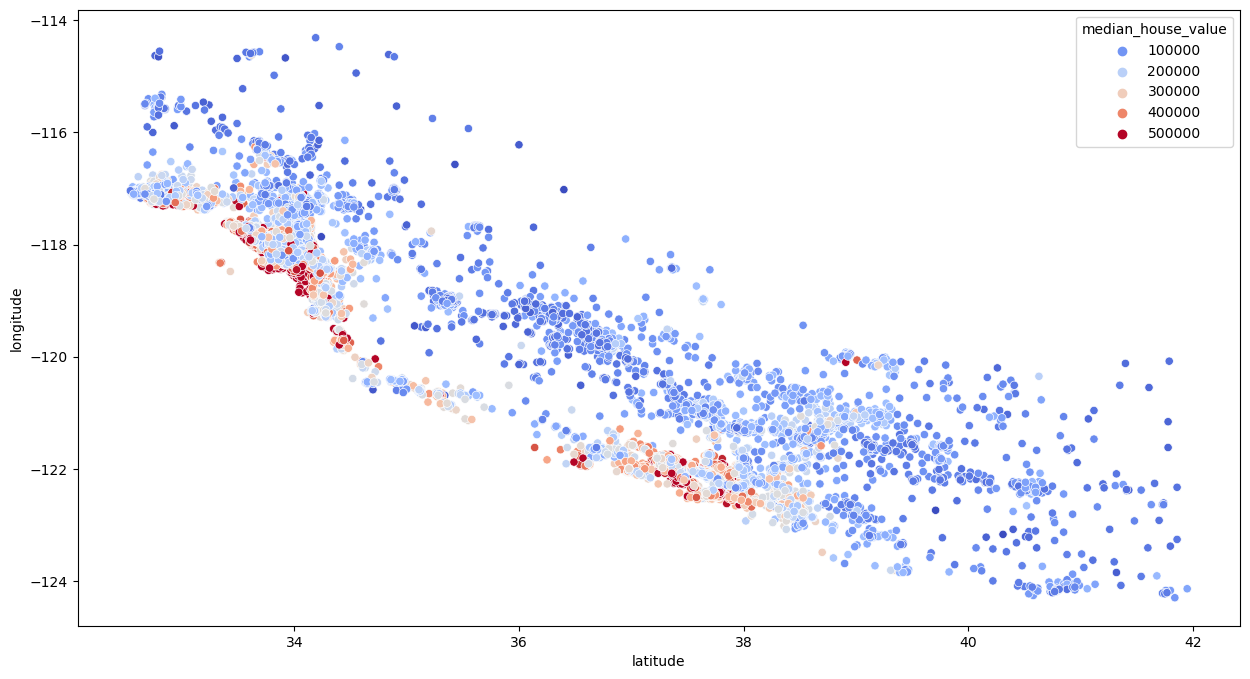

In [121]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [122]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)



LinearRegression()

In [124]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [125]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [128]:
reg.score(x_test, y_test)

0.6777758304136596

In [135]:
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
reg.fit(x_train_s, y_train)

x_test_s = scaler.transform(x_test)

reg.score(x_test_s, y_test)

0.6777973220274696

## Random Forest Model

In [136]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)


RandomForestRegressor()

In [137]:
#unscaled
forest.score(x_test, y_test)

0.8125279696393398

In [139]:
#scaled
forest.fit(x_train_s, y_train)
forest.score(x_test_s, y_test)

0.8142081127657492

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[30, 50, 80],
    "max_features":[8,12, 20],
    "min_samples_split":[2,4,6,8]
}

grid_search=GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 80]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [147]:
best_forest = grid_search.best_estimator_

In [148]:
best_forest.score(x_test_s, y_test)

0.8170474997734903